In [34]:
import pandas as pd 
import matplotlib.pyplot as plt 
import math
nflx = pd.read_csv('NFLX5y.csv')
nflx

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-30,199.619995,201.100006,197.070007,198.369995,198.369995,5439600
1,2017-10-31,198.210007,198.589996,195.220001,196.429993,196.429993,5518600
2,2017-11-01,197.240005,199.199997,196.000000,198.000000,198.000000,5017400
3,2017-11-02,197.449997,199.440002,197.089996,199.320007,199.320007,3606300
4,2017-11-03,199.800003,200.550003,197.990005,200.009995,200.009995,3678800
...,...,...,...,...,...,...,...
1253,2022-10-21,268.950012,290.750000,265.679993,289.570007,289.570007,24862700
1254,2022-10-24,290.230011,290.489990,280.359985,282.450012,282.450012,13326400
1255,2022-10-25,286.950012,297.589996,285.549988,291.019989,291.019989,15100700
1256,2022-10-26,290.040009,305.630005,288.040009,298.619995,298.619995,15714100


In [35]:
nflx.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [38]:
nflx.Date = pd.to_datetime(nflx.Date)
nflx.index = pd.DatetimeIndex(nflx.Date, freq=None)
nflx

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2017-10-30,2017-10-30,199.619995,201.100006,197.070007,198.369995,198.369995,5439600
2017-10-31,2017-10-31,198.210007,198.589996,195.220001,196.429993,196.429993,5518600
2017-11-01,2017-11-01,197.240005,199.199997,196.000000,198.000000,198.000000,5017400
2017-11-02,2017-11-02,197.449997,199.440002,197.089996,199.320007,199.320007,3606300
2017-11-03,2017-11-03,199.800003,200.550003,197.990005,200.009995,200.009995,3678800
...,...,...,...,...,...,...,...
2022-10-21,2022-10-21,268.950012,290.750000,265.679993,289.570007,289.570007,24862700
2022-10-24,2022-10-24,290.230011,290.489990,280.359985,282.450012,282.450012,13326400
2022-10-25,2022-10-25,286.950012,297.589996,285.549988,291.019989,291.019989,15100700


In [39]:
nflx = nflx.drop('Date', axis=1)
nflx.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-30,199.619995,201.100006,197.070007,198.369995,198.369995,5439600
2017-10-31,198.210007,198.589996,195.220001,196.429993,196.429993,5518600
2017-11-01,197.240005,199.199997,196.000000,198.000000,198.000000,5017400
2017-11-02,197.449997,199.440002,197.089996,199.320007,199.320007,3606300
2017-11-03,199.800003,200.550003,197.990005,200.009995,200.009995,3678800


In [2]:
from statsmodels.tsa.stattools import adfuller
# H0: series is not stationary
# H1: series is stationary
adfuller(nflx.Close)[1]


0.3713695143707837

In [ ]:
# import statsmodels.api as sm
# print('mean :' , nflx.Close.mean())
# res = sm.tsa.seasonal_decompose(nflx.Close)
# resplot = res.plot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

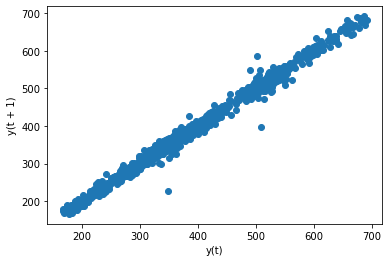

In [3]:
from pandas.plotting import lag_plot


lag_plot(nflx.Close)

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(nflx['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [ ]:
%%time
import matplotlib.dates as mdates
# import matplotlib.pyplot as plt 
import datetime as dt 


plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in nflx.index.values]

plt.plot(x_dates, nflx['High'], label='High')
plt.plot(x_dates, nflx['Low'], label='Low')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
%%time
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in nflx.index.values]

plt.plot(x_dates, nflx['Open'], label='Open')
plt.plot(x_dates, nflx['Close'], label='Close')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [4]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import * 
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit


from pandas.plotting import autocorrelation_plot

2022-10-31 11:40:52.601683: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# X = nflx.drop('Close',axis=1)
# y = nflx['Close']

# sc = StandardScaler()
# X_ft = sc.fit_transform(X.values)
# X_ft = pd.DataFrame(columns=X.columns,
#                    data=X_ft,
#                    index=X.index)

In [ ]:
# X_train = []
# y_train = []

# for i in range(len(nflx)):
#     X_train.append(training_set_scaled[i-60:i, 0])
#     y_train.append(training_set_scaled[i, 0])
# X_train, y_train = np.array(X_train), np.array(y_train)

# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# model = Sequential()
# model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50,return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50,return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50))
# model.add(Dropout(0.2))

# model.add(Dense(units=1))
# model.compile(optimizer='adam',loss='mean_squared_error')

# model.fit(X_train,y_train,epochs=100,batch_size=32)

In [ ]:
# def lstm_split(data, n_steps):
#     X,y = [], []
#     for i in range(len(data)-n_steps+1):
#         X.append(data[i:i + n_steps, :-1])
#         y.append(data[i + n_steps-1, -1])
        
#     return np.array(X), np.array(y)

In [ ]:
# X1, y1 = lstm_split(nflx_ft.values, n_steps=2)

# train_split=0.8
# split_idx = int(np.ceil(len(X1)*train_split))
# date_index = nflx_ft.index

# X_train, X_test = X1[:split_idx], X1[split_idx:]
# y_train, y_test = y1[:split_idx], y1[split_idx:]
# X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:]

# print(X1.shape, X_train.shape, X_test.shape, y_test.shape)

In [ ]:
# lstm = Sequential()
# lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]),
#              activation='relu', return_sequences=True))
# lstm.add(Dense(1))
# lastm.compile(loss='mean_squared_error', optimizer='adam')
# lstm.summary()

In [ ]:
# history=lstm.fit(X_train, y_train,
#                 epochs=100, batch_size=4,
#                 verbose=2, shuffle=False)


In [ ]:
close_prices = nflx['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# training_data_len = math.ceil(len(values)* 0.8)
# train_data = scaled_data[0: training_data_len, :]



In [ ]:
################ data prep for lsmt ################

close_prices = df['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

################ data prep for lsmt ################

In [ ]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
%%time
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

In [ ]:
%%time
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

In [ ]:
%%time
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

In [ ]:
%%time
data = nflx.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
predictions

In [69]:
import yfinance as yf
aapl = yf.download('AAPL', start='2017-10-28', end='2022-10-28')
aapl

# reset index, when columns change data type to date time, and then set it back to index

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-30,40.972500,42.017502,40.930000,41.680000,39.557041,178803200
2017-10-31,41.974998,42.412498,41.735001,42.259998,40.107498,144187200
2017-11-01,42.467499,42.485001,41.402500,41.722500,39.597382,134551200
2017-11-02,41.650002,42.125000,41.320000,42.027500,39.886852,165573600
2017-11-03,43.500000,43.564999,42.779999,43.125000,40.928444,237594400
...,...,...,...,...,...,...
2022-10-21,142.869995,147.850006,142.649994,147.270004,147.270004,86464700
2022-10-24,147.190002,150.229996,146.000000,149.449997,149.449997,75981900
2022-10-25,150.089996,152.490005,149.360001,152.339996,152.339996,74732300


In [70]:
aapl = aapl.reset_index()
aapl

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-30,40.972500,42.017502,40.930000,41.680000,39.557041,178803200
1,2017-10-31,41.974998,42.412498,41.735001,42.259998,40.107498,144187200
2,2017-11-01,42.467499,42.485001,41.402500,41.722500,39.597382,134551200
3,2017-11-02,41.650002,42.125000,41.320000,42.027500,39.886852,165573600
4,2017-11-03,43.500000,43.564999,42.779999,43.125000,40.928444,237594400
...,...,...,...,...,...,...,...
1253,2022-10-21,142.869995,147.850006,142.649994,147.270004,147.270004,86464700
1254,2022-10-24,147.190002,150.229996,146.000000,149.449997,149.449997,75981900
1255,2022-10-25,150.089996,152.490005,149.360001,152.339996,152.339996,74732300
1256,2022-10-26,150.960007,151.990005,148.039993,149.350006,149.350006,88194300


In [71]:
aapl.Date = pd.to_datetime(aapl.Date)
# aapl.index = pd.DatetimeIndex(aapl.Date, freq=None)
# aapl


aapl.set_index('Date', inplace=True)
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-30,40.972500,42.017502,40.930000,41.680000,39.557041,178803200
2017-10-31,41.974998,42.412498,41.735001,42.259998,40.107498,144187200
2017-11-01,42.467499,42.485001,41.402500,41.722500,39.597382,134551200
2017-11-02,41.650002,42.125000,41.320000,42.027500,39.886852,165573600
2017-11-03,43.500000,43.564999,42.779999,43.125000,40.928444,237594400
...,...,...,...,...,...,...
2022-10-21,142.869995,147.850006,142.649994,147.270004,147.270004,86464700
2022-10-24,147.190002,150.229996,146.000000,149.449997,149.449997,75981900
2022-10-25,150.089996,152.490005,149.360001,152.339996,152.339996,74732300


In [77]:
aapl.Close.mean()

94.65841614764142

mean : 94.65841614764142


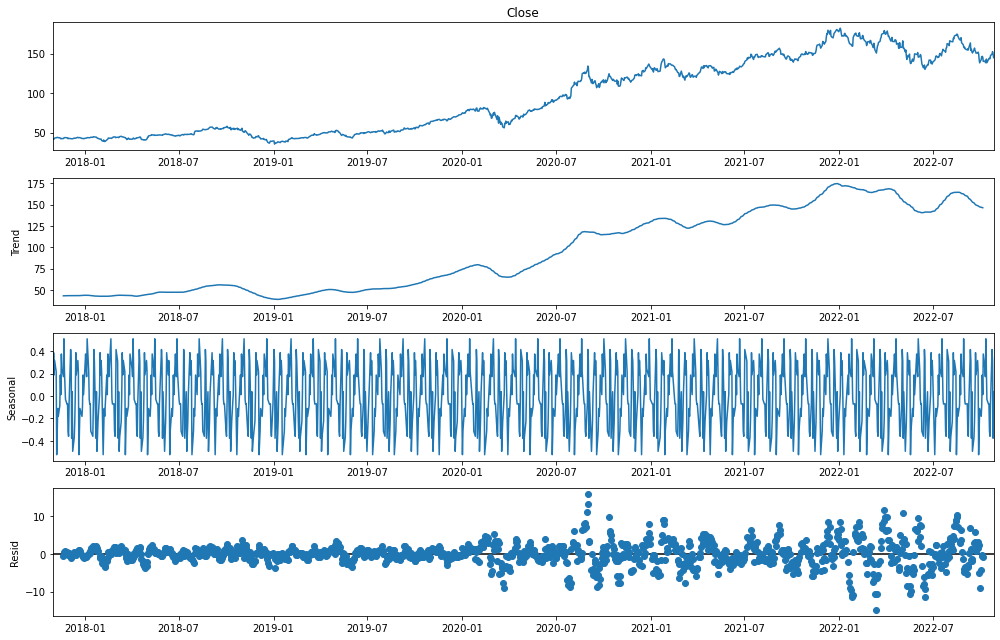

In [83]:
import statsmodels.api as sm
print('mean :' , aapl.Close.mean())
res = sm.tsa.seasonal_decompose(aapl.Close, period=30)
resplot = res.plot()
resplot.set_size_inches((14,9))
resplot.tight_layout()



In [80]:
import yfinance as yf
tmtest = yf.download('TM', start='2017-10-28', end='2022-10-28')
tmtest


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-30,124.250000,124.440002,124.070000,124.389999,124.389999,113500
2017-10-31,123.980003,124.139999,123.669998,124.000000,124.000000,110400
2017-11-01,124.290001,124.919998,124.180000,124.430000,124.430000,194200
2017-11-02,125.050003,125.489998,124.940002,125.309998,125.309998,153100
2017-11-03,125.510002,125.629997,125.019997,125.620003,125.620003,115300
...,...,...,...,...,...,...
2022-10-21,131.690002,133.919998,131.339996,133.759995,133.759995,313600
2022-10-24,133.630005,135.100006,133.139999,134.740005,134.740005,188300
2022-10-25,135.880005,137.910004,135.779999,137.070007,137.070007,193100


mean : 142.93701903278006


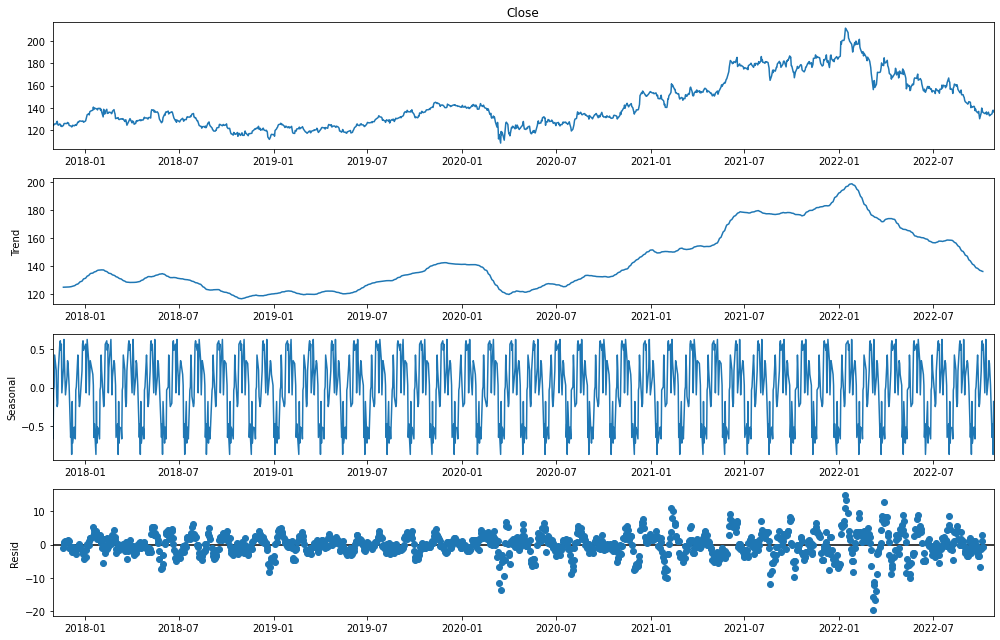

In [82]:
# import statsmodels.api as sm
print('mean :' , tmtest.Close.mean())
res = sm.tsa.seasonal_decompose(tmtest.Close, period=30)
resplot = res.plot()
resplot.set_size_inches((14,9))
resplot.tight_layout()



<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

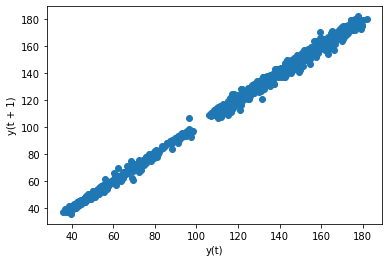

In [58]:
lag_plot(aapl.Close)

In [ ]:
# %%time
# import matplotlib.dates as mdates
# # import matplotlib.pyplot as plt 
# import datetime as dt 


# plt.figure(figsize=(15,10))
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
# x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').Date() for d in aapl.index.values]

# plt.plot(x_dates, aapl['High'], label='High')
# plt.plot(x_dates, aapl['Low'], label='Low')
# plt.xlabel('Time Scale')
# plt.ylabel('Scaled USD')
# plt.legend()
# plt.gcf().autofmt_xdate()
# plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(aapl['Close'], label='Close')
plt.plot(aapl['Open'], label='Open')
plt.xlabel('Date')
plt.ylabel('Prices ($)')
plt.legend()

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('high vs low')
plt.plot(aapl['High'], label='High')
plt.plot(aapl['Low'], label='Low')
plt.xlabel('Date')
plt.ylabel('Prices ($)')
plt.legend()

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Valume History')
plt.plot(aapl['Volume'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [ ]:
close_prices1 = aapl['Close']
values1 = close_prices1.values
training_data_len1 = math.ceil(len(values)* 0.8)

scaler1 = MinMaxScaler(feature_range=(0,1))
scaled_data1 = scaler1.fit_transform(values1.reshape(-1,1))

train_data1 = scaled_data1[0: training_data_len1, :]

x_train1 = []
y_train1 = []

for i in range(60, len(train_data1)):
    x_train1.append(train_data1[i-60:i, 0])
    y_train1.append(train_data1[i, 0])
    
x_train1, y_train1 = np.array(x_train1), np.array(y_train1)

x_train1 = np.reshape(x_train1, (x_train1.shape[0], x_train1.shape[1], 1))

In [ ]:
test_data1 = scaled_data1[training_data_len1-60: , : ]
x_test1 = []
y_test1 = values1[training_data_len1:]

for i in range(60, len(test_data1)):
    x_test1.append(test_data1[i-60:i, 0])

x_test1 = np.array(x_test1)
x_test1 = np.reshape(x_test1, (x_test1.shape[0], x_test1.shape[1], 1))

In [ ]:
%%time
model1 = keras.Sequential()
model1.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train1.shape[1], 1)))
model1.add(layers.LSTM(100, return_sequences=False))
model1.add(layers.Dense(25))
model1.add(layers.Dense(1))
model1.summary()

In [ ]:
%%time
model1.compile(optimizer='adam', loss='mean_squared_error')
model1.fit(x_train1, y_train1, batch_size= 1, epochs=3)

In [ ]:
%%time
predictions1 = model1.predict(x_test1)
predictions1 = scaler1.inverse_transform(predictions1)
rmse1 = np.sqrt(np.mean(predictions1 - y_test1)**2)
rmse1

In [ ]:
%%time
data1 = aapl.filter(['Close'])
train1 = data1[:training_data_len1]
validation1 = data1[training_data_len1:]
validation1['Predicted'] = predictions1
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train1)
plt.plot(validation1[['Close', 'Predicted']])
plt.legend(['Train', 'Val', 'Predicted'], loc='lower right')
plt.show()

In [ ]:
predictions1

In [ ]:
import yfinance as yf
ind = yf.download('INDEX', start='2017-10-28', end='2022-10-28')
ind

In [ ]:
def fiveyears(df):
    close_prices = df['Close']
    values = close_prices.values
    training_data_len = math.ceil(len(values)* 0.8)
    
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(values.reshape(-1,1))
    
    train_data = scaled_data[0: training_data_len, :]
    
    x_train = []
    y_train = []
    
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
        
    x_train, y_train = np.array(x_train), np.array(y_train)
    
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    
    test_data = scaled_data[training_data_len-60: , : ]
    x_test = []
    y_test = values[training_data_len:]
    
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
    
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
    
    model = keras.Sequential()
    model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(layers.LSTM(100, return_sequences=False))
    model.add(layers.Dense(25))
    model.add(layers.Dense(1))
    model.summary()
    
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size= 1, epochs=3)
    
    
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    rmse = np.sqrt(np.mean(predictions - y_test)**2)
    print('rmse', rmse)
    
    
    data = df.filter(['Close'])
    train = data[:training_data_len]
    validation = data[training_data_len:]
    validation['Predicted'] = predictions
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.plot(train)
    plt.plot(validation[['Close', 'Predicted']])
    plt.legend(['Train', 'Val', 'Predicted'], loc='lower right')
    plt.show()

In [ ]:
aapl.dtypes

In [ ]:
%%time
fiveyears(ind)

In [ ]:
%%time
fiveyears(nflx)

In [ ]:
%%time
fiveyears(aapl)

In [ ]:
def test2(df):
    close_prices = df['Close']
    values = close_prices.values
    training_data_len = math.ceil(len(values)* 0.8)
    
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(values.reshape(-1,1))
    
    train_data = scaled_data[0: training_data_len, :]
    
    x_train = []
    y_train = []
    
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
        
    x_train, y_train = np.array(x_train), np.array(y_train)
    
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    
    test_data = scaled_data[training_data_len-60: , : ]
    x_test = []
    y_test = values[training_data_len:]
    
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
    
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
    
    model = keras.Sequential()
    model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(layers.LSTM(100, return_sequences=False))
    model.add(layers.Dense(25))
    model.add(layers.Dense(1))
    model.summary()
    
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size= 1, epochs=5)
    
    
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    rmse = np.sqrt(np.mean(predictions - y_test)**2)
    print('rmse', rmse)
    
    
    data = df.filter(['Close'])
    train = data[:training_data_len]
    validation = data[training_data_len:]
    validation['Predicted'] = predictions
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.plot(train)
    plt.plot(validation[['Close', 'Predicted']])
    plt.legend(['Train', 'Val', 'Predicted'], loc='lower right')
    plt.show()

In [ ]:
%%time
test2(ind)

In [ ]:
twtr = yf.download('TWTR', start='2017-10-28', end='2022-10-28')
twtr

In [ ]:
%%time
test2(twtr)

In [10]:
tm = yf.download('TM', start='2002-10-28', end='2022-10-28')
tm

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-10-28,50.980000,50.990002,49.549999,49.900002,37.701195,79800
2002-10-29,49.000000,49.000000,47.799999,48.320000,36.507465,53000
2002-10-30,49.520000,49.799999,49.279999,49.770000,37.602993,121900
2002-10-31,49.500000,50.000000,48.150002,48.599998,36.719013,115000
2002-11-01,50.750000,51.680000,50.750000,51.099998,38.607849,53000
...,...,...,...,...,...,...
2022-10-21,131.690002,133.919998,131.339996,133.759995,133.759995,313600
2022-10-24,133.630005,135.100006,133.139999,134.740005,134.740005,188300
2022-10-25,135.880005,137.910004,135.779999,137.070007,137.070007,193100


In [ ]:
airbus = yf.download('EADSY', start='2002-10-28', end='2022-10-28')
airbus

In [ ]:
%%time
test2(airbus)

In [ ]:
%%time
test2(tm)

In [ ]:
def test3(df):
    close_prices = df['Close']
    values = close_prices.values
    training_data_len = math.ceil(len(values)* 0.8)
    
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(values.reshape(-1,1))
    
    train_data = scaled_data[0: training_data_len, :]
    
    x_train = []
    y_train = []
    
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
        
    x_train, y_train = np.array(x_train), np.array(y_train)
    
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    
    test_data = scaled_data[training_data_len-60: , : ]
    x_test = []
    y_test = values[training_data_len:]
    
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
    
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
    
    model = keras.Sequential()
    model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(layers.LSTM(100, return_sequences=False))
    model.add(layers.Dense(50))
    model.add(layers.Dense(25))
    model.add(layers.Dense(1))
    model.summary()
    
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size= 1, epochs=5)
    
    
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    rmse = np.sqrt(np.mean(predictions - y_test)**2)
    print('rmse', rmse)
    
    
    data = df.filter(['Close'])
    train = data[:training_data_len]
    validation = data[training_data_len:]
    validation['Predicted'] = predictions
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.plot(train)
    plt.plot(validation[['Close', 'Predicted']])
    plt.legend(['Train', 'Val', 'Predicted'], loc='lower right')
    plt.show()

In [ ]:
sp500 = yf.download('SPX', start='1992-10-28', end='2022-10-28')
sp500

In [ ]:
%%time
test3(sp500)

In [ ]:
def densetest(df):
    close_prices = df['Close']
    values = close_prices.values
    training_data_len = math.ceil(len(values)* 0.8)
    
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(values.reshape(-1,1))
    
    train_data = scaled_data[0: training_data_len, :]
    
    x_train = []
    y_train = []
    
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
        
    x_train, y_train = np.array(x_train), np.array(y_train)
    
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    
    test_data = scaled_data[training_data_len-60: , : ]
    x_test = []
    y_test = values[training_data_len:]
    
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
    
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
    
    model = keras.Sequential()
    model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(layers.LSTM(100, return_sequences=False))
    model.add(layers.Dense(25, activation='relu'))
    model.add(layers.Dense(1, activation='relu'))
    model.summary()
    
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size= 1, epochs=5)
    
    
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    rmse = np.sqrt(np.mean(predictions - y_test)**2)
    print('rmse', rmse)
    
    
    data = df.filter(['Close'])
    train = data[:training_data_len]
    validation = data[training_data_len:]
    validation['Predicted'] = predictions
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.plot(train)
    plt.plot(validation[['Close', 'Predicted']])
    plt.legend(['Train', 'Val', 'Predicted'], loc='lower right')
    plt.show()

In [ ]:
%%time
densetest(ind)

In [ ]:
def densetest2(df):
    close_prices = df['Close']
    values = close_prices.values
    training_data_len = math.ceil(len(values)* 0.8)
    
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(values.reshape(-1,1))
    
    train_data = scaled_data[0: training_data_len, :]
    
    x_train = []
    y_train = []
    
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
        
    x_train, y_train = np.array(x_train), np.array(y_train)
    
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    
    test_data = scaled_data[training_data_len-60: , : ]
    x_test = []
    y_test = values[training_data_len:]
    
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
    
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
    
    model = keras.Sequential()
    model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(layers.LSTM(100, return_sequences=False))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(25, activation='relu'))
    model.add(layers.Dense(1, activation='relu'))
    model.summary()
    
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size= 1, epochs=10)
    
    
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    rmse = np.sqrt(np.mean(predictions - y_test)**2)
    print('rmse', rmse)
    
    
    data = df.filter(['Close'])
    train = data[:training_data_len]
    validation = data[training_data_len:]
    validation['Predicted'] = predictions
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.plot(train)
    plt.plot(validation[['Close', 'Predicted']])
    plt.legend(['Train', 'Val', 'Predicted'], loc='lower right')
    plt.show()

In [ ]:
%%time
densetest2(ind)

In [ ]:
def densetest3(df):
    close_prices = df['Close']
    values = close_prices.values
    training_data_len = math.ceil(len(values)* 0.8)
    
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(values.reshape(-1,1))
    
    train_data = scaled_data[0: training_data_len, :]
    
    x_train = []
    y_train = []
    
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
        
    x_train, y_train = np.array(x_train), np.array(y_train)
    
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    
    test_data = scaled_data[training_data_len-60: , : ]
    x_test = []
    y_test = values[training_data_len:]
    
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
    
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
    
    model = keras.Sequential()
    model.add(layers.LSTM(200, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(layers.LSTM(100, activation='relu', return_sequences=False))
    model.add(layers.Dense(75, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(25, activation='relu'))
    model.add(layers.Dense(1, activation='relu'))
    model.summary()
    
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size= 1, epochs=5)
    
    
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    rmse = np.sqrt(np.mean(predictions - y_test)**2)
    print('rmse', rmse)
    
    
    data = df.filter(['Close'])
    train = data[:training_data_len]
    validation = data[training_data_len:]
    validation['Predicted'] = predictions
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.plot(train)
    plt.plot(validation[['Close', 'Predicted']])
    plt.legend(['Train', 'Val', 'Predicted'], loc='lower right')
    plt.show()

In [ ]:
%%time
densetest3(ind)

In [ ]:
def densetest4(df):
    close_prices = df['Close']
    values = close_prices.values
    training_data_len = math.ceil(len(values)* 0.8)
    
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(values.reshape(-1,1))
    
    train_data = scaled_data[0: training_data_len, :]
    
    x_train = []
    y_train = []
    
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
        
    x_train, y_train = np.array(x_train), np.array(y_train)
    
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    
    test_data = scaled_data[training_data_len-60: , : ]
    x_test = []
    y_test = values[training_data_len:]
    
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
    
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
    
    model = keras.Sequential()
    model.add(layers.LSTM(200, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(layers.LSTM(100, activation='relu', return_sequences=False))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(75, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(25, activation='relu'))
    model.add(layers.Dense(1, activation='relu'))
    model.summary()
    
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size= 1, epochs=5)
    
    
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    rmse = np.sqrt(np.mean(predictions - y_test)**2)
    print('rmse', rmse)
    
    
    data = df.filter(['Close'])
    train = data[:training_data_len]
    validation = data[training_data_len:]
    validation['Predicted'] = predictions
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.plot(train)
    plt.plot(validation[['Close', 'Predicted']])
    plt.legend(['Train', 'Val', 'Predicted'], loc='lower right')
    plt.show()

In [ ]:
%%time
densetest4(ind)

In [ ]:
%%time
densetest4(twtr)

In [ ]:
def densetest5(df):
    close_prices = df['Close']
    values = close_prices.values
    training_data_len = math.ceil(len(values)* 0.8)
    
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(values.reshape(-1,1))
    
    train_data = scaled_data[0: training_data_len, :]
    
    x_train = []
    y_train = []
    
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
        
    x_train, y_train = np.array(x_train), np.array(y_train)
    
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    
    test_data = scaled_data[training_data_len-60: , : ]
    x_test = []
    y_test = values[training_data_len:]
    
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
    
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
    
    model = keras.Sequential()
    model.add(layers.LSTM(100, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(layers.LSTM(100, activation='relu', return_sequences=False))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(75, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(25, activation='relu'))
    model.add(layers.Dense(1, activation='relu'))
    model.summary()
    
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size= 1, epochs=5)
    
    
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    rmse = np.sqrt(np.mean(predictions - y_test)**2)
    print('rmse', rmse)
    
    
    data = df.filter(['Close'])
    train = data[:training_data_len]
    validation = data[training_data_len:]
    validation['Predicted'] = predictions
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.plot(train)
    plt.plot(validation[['Close', 'Predicted']])
    plt.legend(['Train', 'Val', 'Predicted'], loc='lower right')
    plt.show()

In [ ]:
%%time
densetest5(ind)

In [42]:
from pandas_datareader import data

In [43]:
tickers = ['AAPL', 'TWTR', 'TM', 'SPX', 'NFLX', 'TSLA']

start = '2012-10-31'
end = '2022-10-31' 

testdata = data.DataReader(tickers, 'yahoo', start=start, end=end)
testdata

Attributes   Adj Close                                              \
Symbols           AAPL       TWTR          TM      SPX        NFLX   
Date                                                                 
2012-10-31   18.231628        NaN   69.258781  0.06500   11.320000   
2012-11-01   18.268988        NaN   69.777306  0.06500   11.098571   
2012-11-02   17.664455        NaN   69.553810  0.05778   10.985714   
2012-11-05   17.903936        NaN   72.727531  0.05778   11.177143   
2012-11-06   17.849733        NaN   72.629189  0.05778   10.910000   
...                ...        ...         ...      ...         ...   
2022-10-25  152.339996  52.779999  137.070007      NaN  291.019989   
2022-10-26  149.350006  53.349998  137.929993      NaN  298.619995   
2022-10-27  144.800003  53.700001  136.470001      NaN  296.940002   
2022-10-28  155.740005        NaN  139.520004      NaN  295.720001   
2022-10-31  152.339996        NaN  138.011002      NaN  290.804993   

Attributes                   Close                                  ...  \
Symbols           TSLA        AAPL       TWTR          TM      SPX  ...   
Date                                                                ...   
2012-10-31    1.875333   21.261429        NaN   77.470001  0.06500  ...   
2012-11-01    1.950000   21.305000        NaN   78.050003  0.06500  ...   
2012-11-02    1.928000   20.600000        NaN   77.800003  0.05778  ...   
2012-11-05    2.100000   20.879286        NaN   81.349998  0.05778  ...   
2012-11-06    2.076667   20.816071        NaN   81.239998  0.05778  ...   
...                ...         ...        ...         ...      ...  ...   
2022-10-25  222.419998  152.339996  52.779999  137.070007      NaN  ...   
2022-10-26  224.639999  149.350006  53.349998  137.929993      NaN  ...   
2022-10-27  225.089996  144.800003  53.700001  136.470001      NaN  ...   
2022-10-28  228.520004  155.740005        NaN  139.520004      NaN  ...   
2022-10-31  223.500000  152.339996        NaN  138.011002      NaN  ...   

Attributes        Open                                        Volume  \
Symbols             TM      SPX        NFLX        TSLA         AAPL   
Date                                                                   
2012-10-31   76.959999  0.06500    9.487143    1.846667  510003200.0   
2012-11-01   77.599998  0.06500   11.121429    1.883333  361298000.0   
2012-11-02   78.459999  0.06211   11.035714    1.951333  599373600.0   
2012-11-05   80.309998  0.05778   10.652857    1.986667  529135600.0   
2012-11-06   81.169998  0.05778   11.008571    2.040667  374917200.0   
...                ...      ...         ...         ...          ...   
2022-10-25  135.880005      NaN  286.950012  210.100006   74732300.0   
2022-10-26  136.889999      NaN  290.040009  219.399994   88194300.0   
2022-10-27  137.050003      NaN  298.329987  229.770004  109180200.0   
2022-10-28  137.679993      NaN  297.700012  225.399994  164659100.0   
2022-10-31  138.580002      NaN  295.130005  226.190002   28702112.0   

Attributes                                                            
Symbols            TWTR        TM       SPX         NFLX        TSLA  
Date                                                                  
2012-10-31          NaN  290700.0  147434.0  107308600.0  11628000.0  
2012-11-01          NaN  186200.0   15951.0   62669600.0  15361500.0  
2012-11-02          NaN  157200.0  166154.0   29650600.0  15454500.0  
2012-11-05          NaN  681000.0   37385.0   29016400.0  30733500.0  
2012-11-06          NaN  324900.0   92611.0   39102700.0  34860000.0  
...                 ...       ...       ...          ...         ...  
2022-10-25   35077848.0  193100.0       NaN   15100700.0  96507900.0  
2022-10-26   28064973.0  185600.0       NaN   15714100.0  85012500.0  
2022-10-27  136345128.0  194400.0       NaN   14612600.0  61638800.0  
2022-10-28          NaN  207800.0       NaN    9954900.0  69039900.0  
2022-10-31          NaN   28388.0   

In [ ]:
sp5 = yf.download('SPX', start='2012-10-31', end='2022-10-31')
sp5

In [ ]:
tm

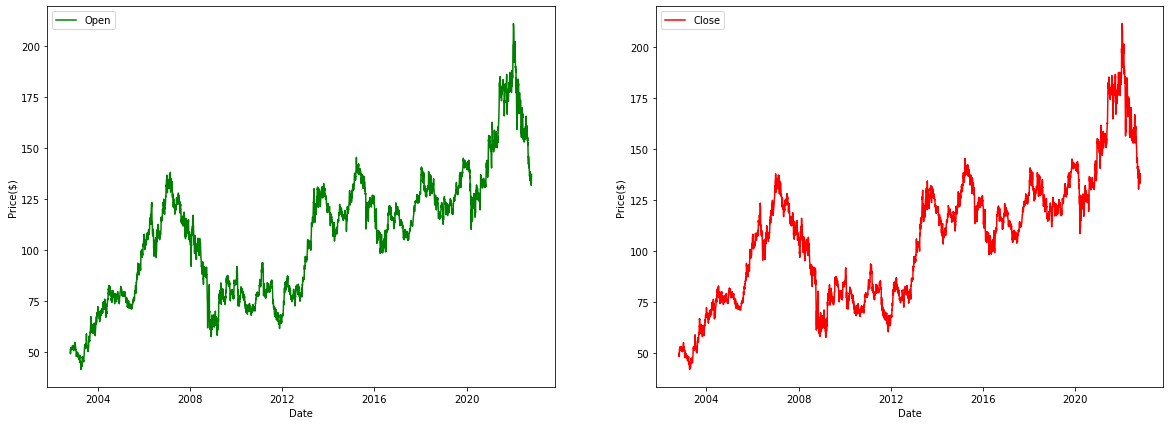

In [24]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(tm ['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=10)
ax[0].set_ylabel('Price($)',size=10)
ax[0].legend()
ax[1].plot(tm ['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=10)
ax[1].set_ylabel('Price($)',size=10)
ax[1].legend()
plt.show()

In [25]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

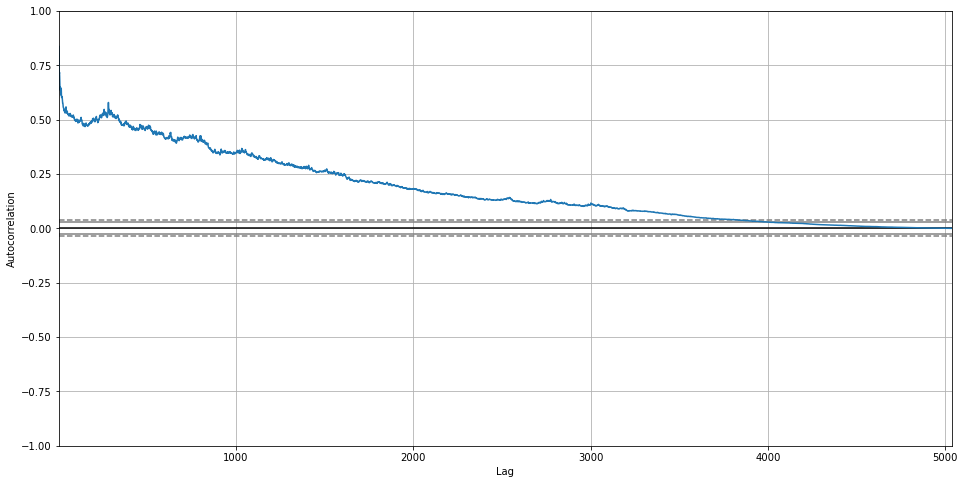

In [26]:
plt.figure(figsize=(16,8))
autocorrelation_plot(tm)


In [84]:
# import statsmodels.api as sm
# print('mean :' , nflx.Close.mean())
# res = sm.tsa.seasonal_decompose(nflx.Close)
# resplot = res.plot()
# resplot.set_size_inches((14,9))
# resplot.tight_layout()


# reset index, when columns change data type to date time, and then set it back to index

In [19]:
from statsmodels.tsa.arima.model import ARIMA


arima_model = ARIMA(tm.value, order=(1,1,2))
model = arima_model.fit()
print(model.summary())


model = ARIMA(tm, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

AttributeError: 'DataFrame' object has no attribute 'value'